<a href="https://colab.research.google.com/github/veersubandh/DS1002-S24/blob/main/1st_April_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name    Anaya Nath                 Computing ID dtv9vd
        # Veer Subandh                           qsj8ew


## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
import pandas as pd
# Load the CSV file into a DataFrame
url = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"
df = pd.read_csv(url, delimiter=';')
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html--I used to pandas documentation to see
#how to import the file as the output was giving me an eroneous 1 column instead of 11 columns
#hence, I used a delimited which used to separate individual pieces of data within a file which is seperated by ';'

# Display the first few rows of the DataFrame
print(df.head())

                   timeOpen                 timeClose  \
0  2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1  2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2  2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3  2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4  2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968  0.853502   
1  2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193  0.864752   
2  2022-12-29T00:49:00.000Z  2022-12-29T21:03:00.000Z  0.885723  0.887118   
3  2022-12-28T00:20:00.000Z  2022-12-28T10:44:00.000Z  0.921162  0.925702   
4  2022-12-27T14:19:00.000Z  2022-12-27T19:12:00.000Z  0.931138  0.955402   

        low     close      volume     marketCap                 timestamp  
0  0.835226  0.842688  3001502.06  2.771561e+08  2022-12-31T23:59:59.999Z  
1  0.826643  0.839048  3608615.07  2.75958

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
# Displaying the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 741
Number of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
#checking for missing values
missing_values= df.isnull().sum
print("Missing values per column:", missing_values)
#dropping missing values
df.dropna(inplace=True)
print("DataFrame after dropping rows with missing values:", df)


Missing values per column: <bound method NDFrame._add_numeric_operations.<locals>.sum of      timeOpen  timeClose  timeHigh  timeLow   open   high    low  close  \
0       False      False     False    False  False  False  False  False   
1       False      False     False    False  False  False  False  False   
2       False      False     False    False  False  False  False  False   
3       False      False     False    False  False  False  False  False   
4       False      False     False    False  False  False  False  False   
..        ...        ...       ...      ...    ...    ...    ...    ...   
736     False      False     False    False  False  False  False  False   
737     False      False     False    False  False  False  False  False   
738     False      False     False    False  False  False  False  False   
739     False      False     False    False  False  False  False  False   
740     False      False     False    False  False  False  False  False   

     volum

In [ ]:
# Checking for duplicate rows
print("Number of duplicate rows before dropping:", df.duplicated().sum())
# Drop duplicate rows
df.drop_duplicates(inplace=True)
# Saving the changes
print("DataFrame after dropping duplicate rows:", df)



Number of duplicate rows before dropping: 14
DataFrame after dropping duplicate rows:                      timeOpen                 timeClose  \
0    2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1    2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2    2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3    2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4    2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   
..                        ...                       ...   
735  2021-01-07T00:00:00.000Z  2021-01-07T23:59:59.999Z   
736  2021-01-06T00:00:00.000Z  2021-01-06T23:59:59.999Z   
737  2021-01-05T00:00:00.000Z  2021-01-05T23:59:59.999Z   
738  2021-01-04T00:00:00.000Z  2021-01-04T23:59:59.999Z   
739  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   

                     timeHigh                   timeLow      open       high  \
0    2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968   0.853502   
1    2022-12-30T04:22:00.000Z  2022-12-30T15:

In [ ]:
# Sort the DataFrame by index
df.sort_index(inplace=True)

# Display the DataFrame after sorting
print("DataFrame after sorting by index:")
print(df)
#sorted the data frame by based on index in ascending order as it accounts for changes to be made to all data points

DataFrame after sorting by index:
                     timeOpen                 timeClose  \
0    2022-12-31T00:00:00.000Z  2022-12-31T23:59:59.999Z   
1    2022-12-30T00:00:00.000Z  2022-12-30T23:59:59.999Z   
2    2022-12-29T00:00:00.000Z  2022-12-29T23:59:59.999Z   
3    2022-12-28T00:00:00.000Z  2022-12-28T23:59:59.999Z   
4    2022-12-27T00:00:00.000Z  2022-12-27T23:59:59.999Z   
..                        ...                       ...   
735  2021-01-07T00:00:00.000Z  2021-01-07T23:59:59.999Z   
736  2021-01-06T00:00:00.000Z  2021-01-06T23:59:59.999Z   
737  2021-01-05T00:00:00.000Z  2021-01-05T23:59:59.999Z   
738  2021-01-04T00:00:00.000Z  2021-01-04T23:59:59.999Z   
739  2021-01-03T00:00:00.000Z  2021-01-03T23:59:59.999Z   

                     timeHigh                   timeLow      open       high  \
0    2022-12-31T15:23:00.000Z  2022-12-31T00:21:00.000Z  0.838968   0.853502   
1    2022-12-30T04:22:00.000Z  2022-12-30T15:12:00.000Z  0.860193   0.864752   
2    2022-12-29T0

In [ ]:
# Assign the list of columns to drop to a variable
dropping_these_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']

# Drop specified columns
df.drop(columns=dropping_these_columns, inplace=True)
# Save the modified DataFrame to a CSV file
df.to_csv("modified_data.csv", index=False)

# Display the modified DataFrame
print(df)

         open       high       low     close       volume  \
0    0.838968   0.853502  0.835226  0.842688   3001502.06   
1    0.860193   0.864752  0.826643  0.839048   3608615.07   
2    0.885723   0.887118  0.843029  0.860231   3766979.57   
3    0.921162   0.925702  0.869842  0.886091   4192949.85   
4    0.931138   0.955402  0.916414  0.923668   4574953.05   
..        ...        ...       ...       ...          ...   
735  9.386493  10.004872  9.215244  9.562131  46303336.73   
736  8.671285   9.390797  8.425946  9.390797  31404627.93   
737  7.528216   8.714947  7.081120  8.664688  49479278.39   
738  6.948680   7.632146  6.358218  7.514079  40526109.15   
739  6.201133   7.007523  6.171834  6.923968  31046652.87   

                    timestamp  
0    2022-12-31T23:59:59.999Z  
1    2022-12-30T23:59:59.999Z  
2    2022-12-29T23:59:59.999Z  
3    2022-12-28T23:59:59.999Z  
4    2022-12-27T23:59:59.999Z  
..                        ...  
735  2021-01-07T23:59:59.999Z  
736  2021-0

Now display the first 10 rows of the cleaned dataset.

In [ ]:
print(df.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  
0  2022-12-31T23:59:59.999Z  
1  2022-12-30T23:59:59.999Z  
2  2022-12-29T23:59:59.999Z  
3  2022-12-28T23:59:59.999Z  
4  2022-12-27T23:59:59.999Z  
5  2022-12-26T23:59:59.999Z  
6  2022-12-25T23:59:59.999Z  
7  2022-12-24T23:59:59.999Z  
8  2022-12-23T23:59:59.999Z  
9  2022-12-22T23:59:59.999Z  


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
#first, I will derive a formula:
#close_change= closing price of current day- closing price of previous day
# Adding new column "close_change" to calculate the difference between daily closing prices
df['close_change'] = df['close'] - df['close'].shift(1)
#.shift(1), it shifts the values of the column down by one position to align values
#with the previous day's values.
# Displaying the revised version of the data frame with new column
print(df)


         open       high       low     close       volume  \
0    0.838968   0.853502  0.835226  0.842688   3001502.06   
1    0.860193   0.864752  0.826643  0.839048   3608615.07   
2    0.885723   0.887118  0.843029  0.860231   3766979.57   
3    0.921162   0.925702  0.869842  0.886091   4192949.85   
4    0.931138   0.955402  0.916414  0.923668   4574953.05   
..        ...        ...       ...       ...          ...   
735  9.386493  10.004872  9.215244  9.562131  46303336.73   
736  8.671285   9.390797  8.425946  9.390797  31404627.93   
737  7.528216   8.714947  7.081120  8.664688  49479278.39   
738  6.948680   7.632146  6.358218  7.514079  40526109.15   
739  6.201133   7.007523  6.171834  6.923968  31046652.87   

                    timestamp  close_change  
0    2022-12-31T23:59:59.999Z           NaN  
1    2022-12-30T23:59:59.999Z     -0.003640  
2    2022-12-29T23:59:59.999Z      0.021183  
3    2022-12-28T23:59:59.999Z      0.025860  
4    2022-12-27T23:59:59.999Z      0.

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
#positive growth is when close change value is > 0
growth = df[df['close_change'] > 0]
# Sort by close_change in descending order as per the question
top_growth_days = growth.sort_values(by='close_change', ascending=False)
# chosing  top 10 growth days
top_10_growth_days = top_growth_days.head(10)

#the first column values are the corresponding indices in the data frame
top_10_growth_days.rename_axis('index number', inplace=True)

# Displaying  the top 10 growth days with their corresponding dates
print("Top 10 days of positive growth for FTX:")
print(top_10_growth_days[['close_change', 'timestamp']])

Top 10 days of positive growth for FTX:
              close_change                 timestamp
index number                                        
56               16.623292  2022-11-07T23:59:59.999Z
468              14.497738  2021-09-16T23:59:59.999Z
598              14.017812  2021-05-18T23:59:59.999Z
478               9.506381  2021-09-15T23:59:59.999Z
473               8.315742  2021-09-19T23:59:59.999Z
484               6.929033  2021-09-09T23:59:59.999Z
350               6.770635  2022-01-20T23:59:59.999Z
594               6.228516  2021-05-22T23:59:59.999Z
481               5.201864  2021-09-12T23:59:59.999Z
605               5.154806  2021-05-11T23:59:59.999Z


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
#first, I will derive the formula for rate_of_change based on close_change
#rate of change = (close_change [ price of current day- price of previous day]/ price of current day )* 100
# Creating the new column rate_of_change
df['rate_of_change'] = (df['close_change'] / df['close']) * 100

# Display the DataFrame with the new column
print(df)

         open       high       low     close       volume  \
0    0.838968   0.853502  0.835226  0.842688   3001502.06   
1    0.860193   0.864752  0.826643  0.839048   3608615.07   
2    0.885723   0.887118  0.843029  0.860231   3766979.57   
3    0.921162   0.925702  0.869842  0.886091   4192949.85   
4    0.931138   0.955402  0.916414  0.923668   4574953.05   
..        ...        ...       ...       ...          ...   
735  9.386493  10.004872  9.215244  9.562131  46303336.73   
736  8.671285   9.390797  8.425946  9.390797  31404627.93   
737  7.528216   8.714947  7.081120  8.664688  49479278.39   
738  6.948680   7.632146  6.358218  7.514079  40526109.15   
739  6.201133   7.007523  6.171834  6.923968  31046652.87   

                    timestamp  close_change  rate_of_change  
0    2022-12-31T23:59:59.999Z           NaN             NaN  
1    2022-12-30T23:59:59.999Z     -0.003640       -0.433855  
2    2022-12-29T23:59:59.999Z      0.021183        2.462476  
3    2022-12-28T23:

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
positive_rate_change = df[df['rate_of_change'] > 0]

# Sort by rate_of_change in descending order
top_positive_rate_change = positive_rate_change.sort_values(by='rate_of_change', ascending=False).head(5)
# Displaying the top 5 days of greatest positive rate change
# Displaying the top 5 days of greatest positive rate change
print("Top 5 days of greatest positive rate change:")
print(top_positive_rate_change[['rate_of_change', 'timestamp']])

negative_rate_change= df[df['rate_of_change']<0]
#sort by rate_of_change in descending order
top_negative_rate_change= negative_rate_change.sort_values(by='rate_of_change', ascending= False).head(5)
#displaying the top 5 days of greatest negative rate change
#displaying the top 5 days of greatest negative e rate change
print("Top 5 days of greatest negative rate change:")
print(top_negative_rate_change[['rate_of_change', 'timestamp']])

Top 5 days of greatest positive rate change:
     rate_of_change                 timestamp
56        75.075175  2022-11-07T23:59:59.999Z
55        58.313683  2022-11-08T23:59:59.999Z
51        28.705850  2022-11-12T23:59:59.999Z
598       27.510072  2021-05-18T23:59:59.999Z
53        26.344388  2022-11-10T23:59:59.999Z
Top 5 days of greatest negative rate change:
     rate_of_change                 timestamp
445       -0.006183  2021-10-16T23:59:59.999Z
181       -0.024259  2022-07-07T23:59:59.999Z
238       -0.031174  2022-05-11T23:59:59.999Z
192       -0.034481  2022-06-26T23:59:59.999Z
88        -0.038502  2022-10-06T23:59:59.999Z


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

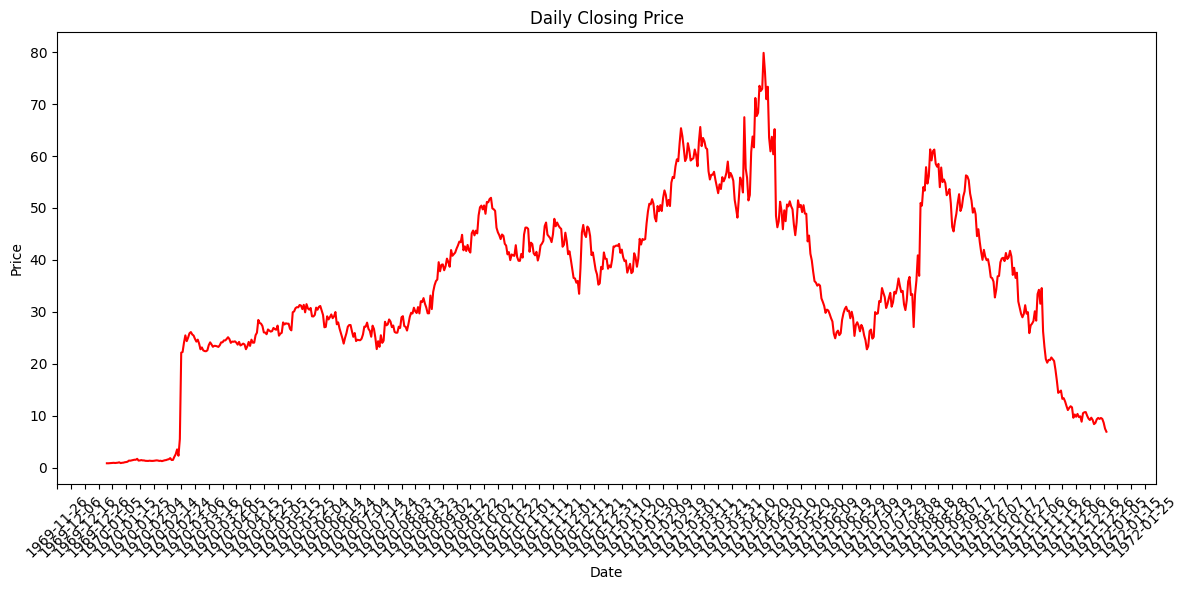

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# I used matplotlib.dates as it offers various functionalities with working with
#dates and times in plots

# Set the date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')
#essentially, this formats the date into year, month, date format

# graph for daily closing price
plt.figure(figsize=(12, 6))
#after trial and error this figsize was most viable and aided the legibility of the data points
plt.plot(df['timestamp'], df['close'], color='red')
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the date format and spacing for the x-axis ticks
plt.gca().xaxis.set_major_formatter(date_format)
#ensures date set in format YYYY-MM-DD
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
#sets spacing of the major ticks on the x-axis to every 10 days
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()





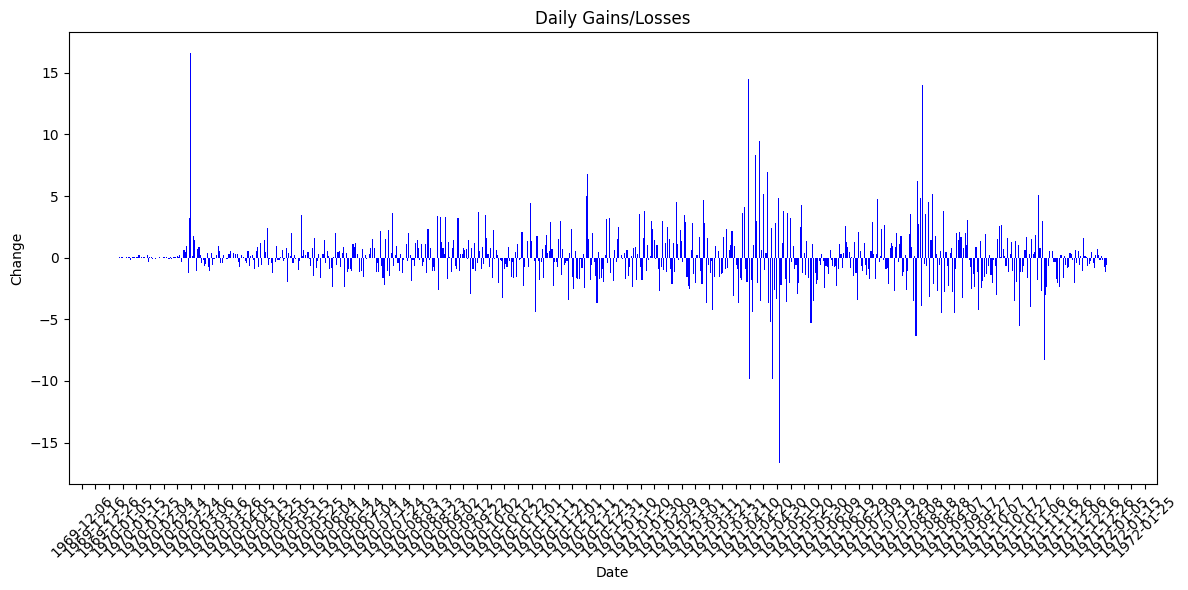

In [ ]:
#Similarly, I will graph daily gains and losses
plt.figure(figsize=(12, 6))
plt.bar(df['timestamp'], df['close_change'], color='blue')
plt.title('Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Change')

# Set the date format and spacing for the x-axis ticks
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Adjust the interval as needed
plt.xticks(rotation=45, fontsize=10)  # Increase font size for better visibility

plt.tight_layout()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

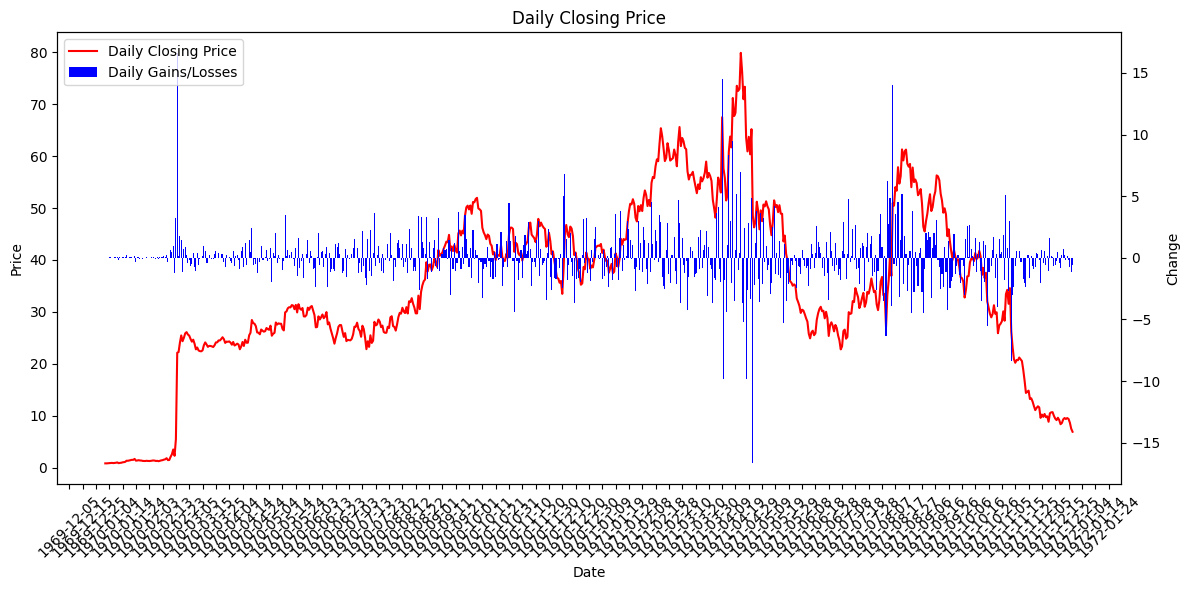

In [ ]:
#https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=This%20post%20describes%20how%20to,Y%20axis%20on%20this%20twin.
#my research revealed that the twinx() function is used
#to create graphs with two Y axis scales

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')

# Create figure and axis objects for daily closing price
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df['timestamp'], df['close'], color='red', label='Daily Closing Price')
ax1.set_title('Daily Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Set the date format and spacing for the x-axis ticks
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax1.tick_params(axis='x', rotation=45, labelsize=10)

# Create a secondary y-axis for daily gains/losses
ax2 = ax1.twinx()
ax2.bar(df['timestamp'], df['close_change'], color='blue', label='Daily Gains/Losses')
ax2.set_ylabel('Change')

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')